In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../../../src")

from mask_dataset import MaskedDataset
dataset = MaskedDataset(model_name='mbert')

Load pre-saved file /home/xzhao/workspace/probing-mulitlingual/result/dataset-mbert/mlama-dataset.pkl for MaskedDataset instance


In [2]:
from wikidata.wiki_2018_dump import get_article_size_per_lang, get_abstract_size_per_lang, get_article_gz_size_per_lang, get_abstract_gz_size_per_lang, get_title_count_per_lang
from pred_evaluation import calculate_overall_p1_score_standard
# lang2cnt = get_title_count_per_lang()
# lang2cnt = get_article_size_per_lang()
lang2cnt = get_abstract_size_per_lang()
# lang2cnt = get_article_gz_size_per_lang()
# lang2cnt = get_abstract_gz_size_per_lang()
lang2p1 = calculate_overall_p1_score_standard(dataset)    

# Extract values
sorted_lang = sorted(lang2cnt, key=lambda k: lang2cnt[k], reverse=False)
title_cnts = [lang2cnt[lang]/1024 for lang in sorted_lang]
p1_scores = [round(lang2p1[lang], 4)*100 for lang in sorted_lang]

# Calculate correlation using numpy
correlation = np.corrcoef(title_cnts, p1_scores)[0, 1]
text_str = f'Correlation: {correlation:.2f}'
print(text_str)

Correlation: 0.51


In [3]:
sorted_lang_ills = sorted(lang2cnt, key=lambda k: lang2p1[k], reverse=True)
print(sorted_lang_ills)

['en', 'id', 'it', 'de', 'es', 'nl', 'pt', 'ca', 'tr', 'da', 'ms', 'sv', 'fr', 'af', 'ro', 'vi', 'gl', 'fa', 'cy', 'el', 'he', 'ko', 'zh', 'pl', 'ar', 'hu', 'hr', 'cs', 'ceb', 'et', 'sq', 'sk', 'bg', 'ur', 'uk', 'fi', 'hy', 'sr', 'hi', 'be', 'eu', 'lv', 'az', 'ru', 'bn', 'ka', 'ja', 'sl', 'lt', 'la', 'ga', 'ta', 'th']


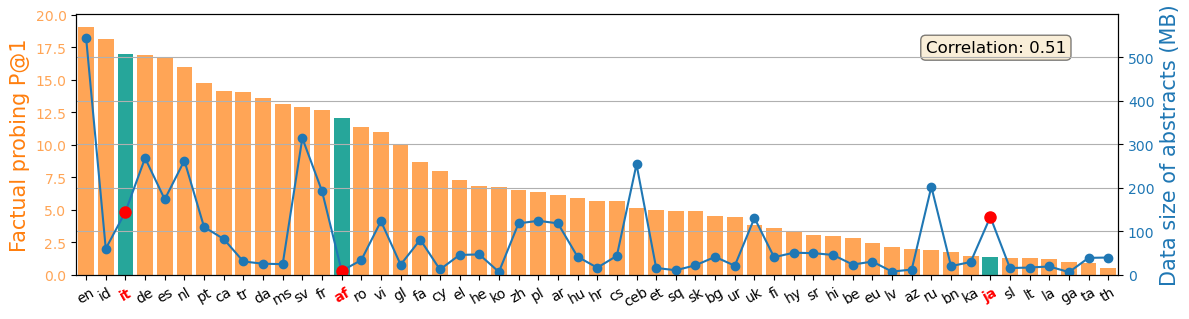

In [4]:
from matplotlib.ticker import PercentFormatter

import matplotlib
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True

# Extract values
sorted_lang = sorted(lang2cnt, key=lambda k: lang2p1[k], reverse=False)
title_cnts = [lang2cnt[lang]/1024 for lang in sorted_lang]
p1_scores = [round(lang2p1[lang]*100, 4) for lang in sorted_lang]

# Your provided lists
x = list(range(len(sorted_lang), 0, -1))
# langs = [dataset.display_lang(lang, prefix=False) for lang in sorted_lang]
langs = [lang for lang in sorted_lang]

fig, ax1 = plt.subplots(figsize=(12, 3.3))

highlighted_languages = ['it', 'af', 'ja']
highlight_color = "#26a69a"  # Example red color
normal_color = "#FF7F0EB3"

ax1.set_xticks(x)
# ax1.set_xticklabels(langs, rotation=90, fontsize=12.5)
ax1.set_xticklabels(langs, fontsize=10, rotation=30)

ax1.set_ylabel('Factual probing P@1', fontsize=15, color="#ff7f0e")

colors = [highlight_color if lang in highlighted_languages else normal_color for lang in langs]
percentage_labels = [f"{value*100}" for value in p1_scores]

ax1.bar(x, p1_scores, color=colors)
ax1.tick_params(axis='y', labelcolor=normal_color)
ax1.set_xlim(min(x) - 0.5, max(x) + 0.5)
# ax1.yaxis.set_major_formatter(PercentFormatter(1))

for tick in ax1.get_xticklabels():
    if tick.get_text() in highlighted_languages:
        tick.set_color('r')
        tick.set_fontweight('bold')
# Annotate for Factual probing p1 score (red curve)
# for i, txt in enumerate(p1_scores):
#     ax1.annotate(f"{txt*100:.1f}%", (x[i], p1_scores[i]), fontsize=10, ha='center', va='bottom', xytext=(0,0), textcoords='offset points', rotation=50)

# Create the second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Data size of abstracts (MB)', fontsize=15, color="#1f77b4")
ax2.plot(x, title_cnts, marker='o', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor="#1f77b4")

for lang, xi, yi in zip(langs, x, title_cnts):
    if lang in highlighted_languages:
        ax2.plot(xi, yi, 'ro', markersize=8)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.95, 0.9, text_str, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)
ax2.set_ylim(0, max(title_cnts)*1.1)  # 1
plt.grid(True)
# plt.title('Wikipedia page count vs Factual probing P@1 on 53 languages', fontsize=15)
plt.tight_layout()
plt.savefig("../../display/figures/abstract_size_vs_p1.updated.eps", format='eps', bbox_inches="tight", pad_inches=0.1)


Japanese 6 132.9365234375
Afrikaans 3 8.6435546875
Italian 2 144.6318359375


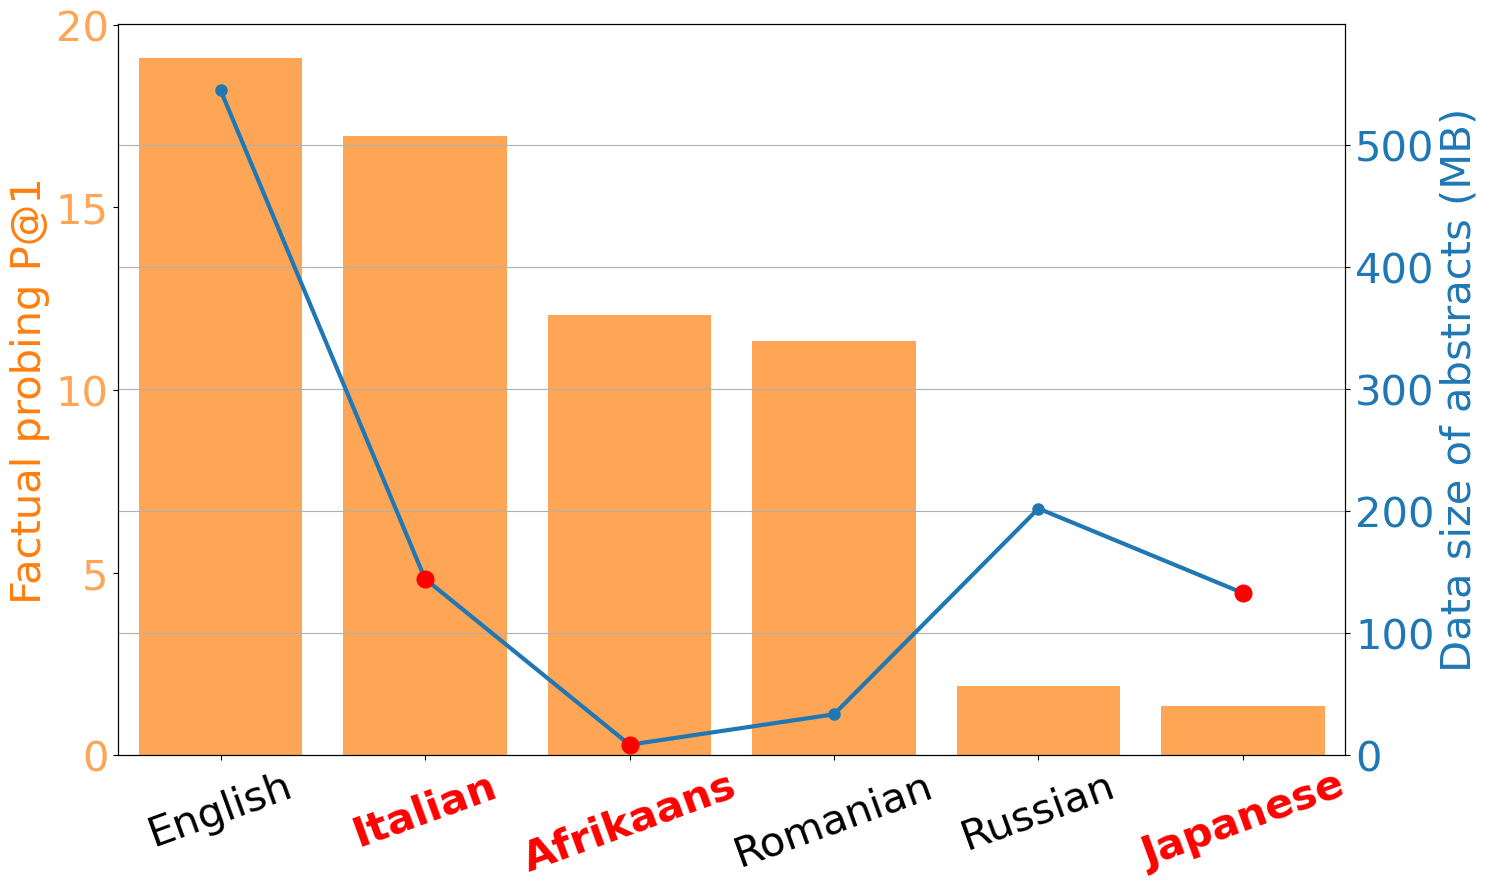

In [20]:
from matplotlib.ticker import PercentFormatter

import matplotlib
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True

# Extract values
# sorted_lang = sorted(lang2cnt, key=lambda k: lang2p1[k], reverse=False)
lang2cnt2 = {lang: lang2cnt[lang] for lang in ['en', 'it', 'af', 'ro', 'ja', 'ru']}
sorted_lang2 = sorted(lang2cnt2, key=lambda k: lang2p1[k], reverse=False)
title_cnts2 = [lang2cnt[lang]/1024 for lang in sorted_lang2]
p1_scores2 = [round(lang2p1[lang]*100, 4) for lang in sorted_lang2]

# Your provided lists
x = list(range(len(sorted_lang2), 0, -1))
# langs = [dataset.display_lang(lang, prefix=False) for lang in sorted_lang2]
langs = [dataset.display_lang(lang, False) for lang in sorted_lang2]

fig, ax1 = plt.subplots(figsize=(15, 9))

highlighted_languages = [dataset.display_lang(lang, False) for lang in ['it', 'af', 'ja']]
highlight_color = "#26a69a"  # Example red color
normal_color = "#FF7F0EB3"

ax1.set_xticks(x)
# ax1.set_xticklabels(langs, rotation=90, fontsize=12.5)
ax1.set_xticklabels(langs, fontsize=30, rotation=20)

ax1.set_ylabel('Factual probing P@1', fontsize=30, color="#ff7f0e")

# colors = [highlight_color if lang in highlighted_languages else normal_color for lang in langs]
colors = [normal_color if lang in highlighted_languages else normal_color for lang in langs]
percentage_labels = [f"{value*100}" for value in p1_scores2]

ax1.bar(x, p1_scores2, color=colors)
ax1.tick_params(axis='y', labelcolor=normal_color, labelsize=30)
ax1.set_xlim(min(x) - 0.5, max(x) + 0.5)
# ax1.yaxis.set_major_formatter(PercentFormatter(1))

for tick in ax1.get_xticklabels():
    if tick.get_text() in highlighted_languages:
        tick.set_color('r')
        tick.set_fontweight('bold')
# Annotate for Factual probing p1 score (red curve)
# for i, txt in enumerate(p1_scores2):
#     ax1.annotate(f"{txt*100:.1f}%", (x[i], p1_scores2[i]), fontsize=10, ha='center', va='bottom', xytext=(0,0), textcoords='offset points', rotation=50)

# Create the second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Data size of abstracts (MB)', fontsize=30, color="#1f77b4")
ax2.plot(x, title_cnts2, marker='o', color='#1f77b4', markersize=8, linewidth=3)
ax2.tick_params(axis='y', labelcolor="#1f77b4", labelsize=30)
# print(title_cnts2)
for lang, xi, yi in zip(langs, x, title_cnts2):
    if lang in highlighted_languages:
        print(lang, xi, yi)
        ax2.plot(xi, yi, 'ro', markersize=12)

# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax1.text(0.95, 0.9, text_str, transform=ax1.transAxes, fontsize=12,
#         verticalalignment='top', horizontalalignment='right', bbox=props)
ax2.set_ylim(0, max(title_cnts)*1.1)  # 1
plt.grid(True)
# plt.title('Wikipedia page count vs Factual probing P@1 on 53 languages', fontsize=15)
plt.tight_layout()
plt.savefig("../../display/figures/abstract_size_vs_p1_example.updated.eps", format='eps', bbox_inches="tight", pad_inches=0.1)


In [ ]:
from wikidata.wiki_2018_dump import get_article_size_per_lang, get_abstract_size_per_lang, get_title_count_per_lang

lang2arctile_sizes = get_article_size_per_lang()
lang2abstract_sizes = get_abstract_size_per_lang()
lang2title_sizes = get_title_count_per_lang()

arctile_sizes = np.asarray([lang2arctile_sizes[lang] for lang in sorted_lang])
abstract_sizes = np.asarray([lang2abstract_sizes[lang] for lang in sorted_lang])
title_sizes = np.asarray([lang2title_sizes[lang] for lang in sorted_lang])


arctile_sizes = arctile_sizes / arctile_sizes.sum()
abstract_sizes = abstract_sizes / abstract_sizes.sum()
title_sizes = title_sizes / title_sizes.sum()

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

print(kl_divergence(arctile_sizes, title_sizes))
print(kl_divergence(abstract_sizes, title_sizes))

print(np.corrcoef(arctile_sizes, title_sizes)[0, 1])
print(np.corrcoef(abstract_sizes, title_sizes)[0, 1])